## Understanding the data

**file_01** : Contains information of the product quantities that needs to be supplied from source facility location to customer location and who is the current logistics vendor to fulfill the supply

**file_02**: Have the cost (per product) data that needs to be paid to each logistics vendor (as per the product size etc etc)

**file_04**: Has the information about the zones (which source_facility and customer location combination falls into which zone)

Questions to be answered

1.     What is the current vendor wise supply volume distributed

2.     What is the current vendor wise cost incurred for fulfilling the supply network

3.     What is the least cost that will be incurred to fulfill this supply network?

4.     How much cost savings can be done if we chose the least cost to fulfill this network

In [271]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pyxlsb # this library is needed because the data provided was in .xlsb format(Binary)

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [59]:
df1 = pd.read_excel(r'D:\Data Science\Gaint Business Solutions Assignment\file_01_current_suppy_network.xlsb', engine='pyxlsb')
df2 = pd.read_excel(r'D:\Data Science\Gaint Business Solutions Assignment\file_02_cost_data.xlsb', engine='pyxlsb')
df3 = pd.read_excel(r'D:\Data Science\Gaint Business Solutions Assignment\file_04_zone_info.xlsb', engine='pyxlsb')


# We have total 3 DataFrames - df1, df2, df3

In [60]:
df1.shape, df3.shape

((92851, 6), (92851, 3))

In [61]:
df1.head()

,supplier_location,customer_location,shpment_size,payment_option,product_quantity,current_logistics_vendor
0,facility_01,201301,small,cod,2156,v1
1,facility_01,122001,small,cod,1859,v1
2,facility_01,248001,small,cod,1805,v1
3,facility_01,201301,small,prepaid,1555,v1
4,facility_01,800001,small,cod,1508,v1


In [62]:
df3.head()

,source,destination,shipment_zone
0,facility_06,110001,zone_a
1,facility_06,110001,zone_a
2,facility_06,110001,zone_a
3,facility_06,110001,zone_a
4,facility_06,110001,zone_a


## Renaming the df1 columns for our convenience.

Because later while merging it will be easier for us to merge on some columns

In [63]:
df1.rename(columns = {'supplier_location': 'source', 'customer_location' : 'destination', 'shpment_size' : 'size', 'payment_option' : 'mode' }, inplace=True)

In [104]:
df1.head()

,source,destination,size,mode,product_quantity,current_logistics_vendor
0,facility_01,201301,small,cod,2156,v1
1,facility_01,122001,small,cod,1859,v1
2,facility_01,248001,small,cod,1805,v1
3,facility_01,201301,small,prepaid,1555,v1
4,facility_01,800001,small,cod,1508,v1


In [105]:
df2.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4
0,zone_c,cod,large,1480,1480,1100,1080
1,zone_c,cod,medium,480,560,410,410
2,zone_c,cod,small,90,120,80,80
3,zone_c,prepaid,large,1450,1430,1040,1050
4,zone_c,prepaid,medium,450,510,380,370


In [67]:
df3.head()

,source,destination,shipment_zone
0,facility_06,110001,zone_a
1,facility_06,110001,zone_a
2,facility_06,110001,zone_a
3,facility_06,110001,zone_a
4,facility_06,110001,zone_a


In [115]:
df2['zone'].value_counts() # some of the zone values in df2 are in the upper case so we will convert them into lower

zone_a    6
zone_b    6
zone_c    6
Name: zone, dtype: int64

## In the df2  'zone' column is having some upper case values so converting them to lower case. 

In [108]:
df2['zone'] = df2['zone'].str.lower()

In [109]:
df2['zone'].value_counts() # Now all converted to lower case!!

zone_a    6
zone_b    6
zone_c    6
Name: zone, dtype: int64

In [118]:
df3['shipment_zone'].value_counts() # our df3 column and df2 column both have this zones related column!!

zone_c    52211
zone_b    35563
zone_a     5077
Name: shipment_zone, dtype: int64

# Merging df1 & df3 on ['source','destination'] and creating a result dataframe

So that we can determine the zones 

In [119]:
df1.shape, df3.shape # Checking the shape before merging

((92851, 6), (92851, 3))

In [120]:
result = pd.merge(df1, df3, on=["source", "destination"])
result.shape

(255089, 7)

### After merging we observed that there are many duplicate values which got merged so we will be removing the duplicate data from our dataframe!

In [121]:
result.drop_duplicates(inplace=True) # Dropping the Duplicate Data entries

In [123]:
result.shape # All duplicate datas are removed now

(92851, 7)

In [124]:
result.reset_index(inplace=True)
result.drop(columns='index',inplace=True)

In [125]:
result.head()

,source,destination,size,mode,product_quantity,current_logistics_vendor,shipment_zone
0,facility_01,201301,small,cod,2156,v1,zone_a
1,facility_01,201301,small,prepaid,1555,v1,zone_a
2,facility_01,201301,medium,cod,1307,v1,zone_a
3,facility_01,201301,medium,prepaid,1094,v1,zone_a
4,facility_01,201301,large,cod,7,v1,zone_a


In [130]:
df1.shape, df3.shape

((92851, 6), (92851, 3))

In [131]:
result.shape

(92851, 7)

# 1. Finding the vendor wise supply volume(product_quantity) distributed 

In [133]:
result.groupby(['current_logistics_vendor'])['product_quantity'].sum()

current_logistics_vendor
v1    3099255
v2      94423
v3     116688
v4     194907
Name: product_quantity, dtype: int64

In [177]:
mt = pd.DataFrame(result.groupby(['current_logistics_vendor'])['product_quantity'].sum())
mt.reset_index(inplace=True)


In [182]:
mt

,current_logistics_vendor,product_quantity
0,v1,3099255
1,v2,94423
2,v3,116688
3,v4,194907


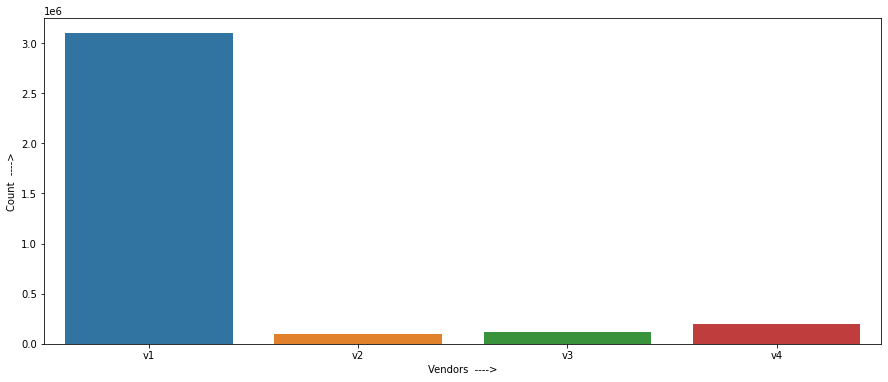

In [186]:
plt.figure(figsize=(15,6))
sns.barplot(x="current_logistics_vendor", y ="product_quantity", data=mt)
plt.xlabel('Vendors  ---->')
plt.ylabel('Count  ---->')
plt.show()

- V1 vendor is having the most product quantity **supply volume** 3099255
- V4 vendor is having the 2nd highest product quantity **supply volume** 194907
- V3 vendor is having the 3rd highest product quatity **supply volume** 116688
- V4 vendor is having the least product quantity **supply volume** 94423


In [188]:
result.head()

,source,destination,size,mode,product_quantity,current_logistics_vendor,zone
0,facility_01,201301,small,cod,2156,v1,zone_a
1,facility_01,201301,small,prepaid,1555,v1,zone_a
2,facility_01,201301,medium,cod,1307,v1,zone_a
3,facility_01,201301,medium,prepaid,1094,v1,zone_a
4,facility_01,201301,large,cod,7,v1,zone_a


## Renaming the  " shipment_zone "   to  " zone " because it will be easy to merge afterwards

In [189]:
result.rename(columns={'shipment_zone' : 'zone'}, inplace=True)

In [190]:
result.head()

,source,destination,size,mode,product_quantity,current_logistics_vendor,zone
0,facility_01,201301,small,cod,2156,v1,zone_a
1,facility_01,201301,small,prepaid,1555,v1,zone_a
2,facility_01,201301,medium,cod,1307,v1,zone_a
3,facility_01,201301,medium,prepaid,1094,v1,zone_a
4,facility_01,201301,large,cod,7,v1,zone_a


In [191]:
result.shape

(92851, 7)

In [192]:
df2.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4
0,zone_c,cod,large,1480,1480,1100,1080
1,zone_c,cod,medium,480,560,410,410
2,zone_c,cod,small,90,120,80,80
3,zone_c,prepaid,large,1450,1430,1040,1050
4,zone_c,prepaid,medium,450,510,380,370


In [193]:
df2.shape

(18, 7)

# Merging result & df2 on ['zone','mode','size'] and creating our final DataFrame

In [194]:
final = pd.merge(df2,result,on=['zone','mode','size'])

In [195]:
final.shape

(90091, 11)

In [196]:
final.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,source,destination,product_quantity,current_logistics_vendor
0,zone_c,cod,large,1480,1480,1100,1080,facility_01,452001,5,v1
1,zone_c,cod,large,1480,1480,1100,1080,facility_01,791102,14,v3
2,zone_c,cod,large,1480,1480,1100,1080,facility_01,736101,5,v1
3,zone_c,cod,large,1480,1480,1100,1080,facility_02,452001,16,v1
4,zone_c,cod,large,1480,1480,1100,1080,facility_02,492001,10,v1


# Since we have already calculated the zones based on the source and destination. so Dropping the source and destination columns

In [197]:
final.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,source,destination,product_quantity,current_logistics_vendor
0,zone_c,cod,large,1480,1480,1100,1080,facility_01,452001,5,v1
1,zone_c,cod,large,1480,1480,1100,1080,facility_01,791102,14,v3
2,zone_c,cod,large,1480,1480,1100,1080,facility_01,736101,5,v1
3,zone_c,cod,large,1480,1480,1100,1080,facility_02,452001,16,v1
4,zone_c,cod,large,1480,1480,1100,1080,facility_02,492001,10,v1


In [168]:
final.shape

(90091, 11)

In [198]:
final.drop(columns=['source', 'destination'],inplace=True)

# At this point after all the preprocessing we successfully created our Final DataFrame and from here we will be doing our further analysis and observing the results

In [199]:
final.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,product_quantity,current_logistics_vendor
0,zone_c,cod,large,1480,1480,1100,1080,5,v1
1,zone_c,cod,large,1480,1480,1100,1080,14,v3
2,zone_c,cod,large,1480,1480,1100,1080,5,v1
3,zone_c,cod,large,1480,1480,1100,1080,16,v1
4,zone_c,cod,large,1480,1480,1100,1080,10,v1


In [200]:
final.shape

(90091, 9)

In [201]:
final['mode'].value_counts()

cod        61832
prepaid    28259
Name: mode, dtype: int64

In [218]:
final[final['current_logistics_vendor'] == 'v2']

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,product_quantity,current_logistics_vendor
32,zone_c,cod,large,1480,1480,1100,1080,9,v2
37,zone_c,cod,large,1480,1480,1100,1080,8,v2
51,zone_c,cod,large,1480,1480,1100,1080,6,v2
108,zone_c,cod,large,1480,1480,1100,1080,5,v2
118,zone_c,cod,large,1480,1480,1100,1080,6,v2
142,zone_c,cod,medium,480,560,410,410,120,v2
236,zone_c,cod,medium,480,560,410,410,50,v2
242,zone_c,cod,medium,480,560,410,410,63,v2
256,zone_c,cod,medium,480,560,410,410,54,v2
408,zone_c,cod,medium,480,560,410,410,22,v2


## In " zone_a "  there are no COD delivery ... and it is the less busiest zone

In [213]:
final.groupby(['zone']).get_group('zone_a')['mode'].value_counts()

prepaid    2317
Name: mode, dtype: int64

##  " zone_c "  is the most busiest zone among all the 3 zones

In [211]:
final.groupby(['zone'])['product_quantity'].sum()

zone
zone_a     152835
zone_b    1361689
zone_c    1705232
Name: product_quantity, dtype: int64

In [226]:
current_cost_with_v1.columns

Index(['zone', 'mode', 'size', 'cost_with_vendor_v1', 'cost_with_vendor_v2',
       'cost_with_vendor_v3', 'cost_with_vendor_v4', 'product_quantity',
       'current_logistics_vendor'],
      dtype='object')

In [217]:
final['current_logistics_vendor'].value_counts()

v1    71880
v4    10146
v3     4835
v2     3230
Name: current_logistics_vendor, dtype: int64

# 2. Currently logistic vendor wise cost incurred for fullfilling the supply network
 First we create separate dataframes by filtering all the 4 vendors separately

# Vendor V1 :

In [234]:
current_cost_with_v1 = final[final['current_logistics_vendor']=='v1']
(current_cost_with_v1['product_quantity'] * current_cost_with_v1['cost_with_vendor_v1']).sum()

342382960

### 342 Million approx with current logistic vendor v1

In [253]:
(current_cost_with_v1['product_quantity'] * current_cost_with_v1['cost_with_vendor_v2']).sum()

434850420

In [254]:
(current_cost_with_v1['product_quantity'] * current_cost_with_v1['cost_with_vendor_v3']).sum()

291111000

In [255]:
(current_cost_with_v1['product_quantity'] * current_cost_with_v1['cost_with_vendor_v4']).sum()

338456440

In [258]:
342382960-291111000 # Cost Savings can be done if we go with vendor v3

51271960

## If we choose the least cost among all 4 vendors then approx  v3 is giving 291 million ...so we can save  51 million approx

# Vendor V2 :

In [256]:
current_cost_with_v2 = final[final['current_logistics_vendor']=='v2']
(current_cost_with_v2['product_quantity'] * current_cost_with_v2['cost_with_vendor_v2']).sum()

12146580

### 12 Million approx with current logistic vendor v2


In [259]:
(current_cost_with_v2['product_quantity'] * current_cost_with_v2['cost_with_vendor_v3']).sum()

8102390

In [260]:
(current_cost_with_v2['product_quantity'] * current_cost_with_v2['cost_with_vendor_v4']).sum()

9030720

In [261]:
(current_cost_with_v2['product_quantity'] * current_cost_with_v2['cost_with_vendor_v1']).sum()

9177700

In [263]:
12146580 - 8102390 # 4 million Cost Savings can be done if we go with vendor v3

4044190

## If we choose the least cost among all 4 vendors then here  v3 is giving 8 million approx cost...so we can save around  4 million 

# Vendor v3 :

In [235]:
current_cost_with_v3 = final[final['current_logistics_vendor']=='v3']
(current_cost_with_v3['product_quantity'] * current_cost_with_v3['cost_with_vendor_v3']).sum()

12659020

### 12 Million approx with current logistic vendor v3


In [264]:
(current_cost_with_v3['product_quantity'] * current_cost_with_v3['cost_with_vendor_v4']).sum()

15061320

In [265]:
(current_cost_with_v3['product_quantity'] * current_cost_with_v3['cost_with_vendor_v1']).sum()

14928260

In [266]:
(current_cost_with_v3['product_quantity'] * current_cost_with_v3['cost_with_vendor_v2']).sum()

19238110

## If we choose the least cost among all 4 vendors then in this case we are taking right decision to go with vendor v3 because vendor v3 is the lowest charging vendor in this case 

# Vendor v4 :

In [237]:
current_cost_with_v4 = final[final['current_logistics_vendor']=='v4']
(current_cost_with_v4['product_quantity'] * current_cost_with_v4['cost_with_vendor_v4']).sum()

19843650

### 19 Million approx with current logistic vendor v4


In [267]:
(current_cost_with_v4['product_quantity'] * current_cost_with_v4['cost_with_vendor_v1']).sum()

19859360

In [268]:
(current_cost_with_v4['product_quantity'] * current_cost_with_v4['cost_with_vendor_v2']).sum()

26220820

In [269]:
(current_cost_with_v4['product_quantity'] * current_cost_with_v4['cost_with_vendor_v3']).sum()

17492340

## 3. If we choose the least cost among all 4 vendors then here  v3 is giving 17.5 million approx cost...so we can save around  2 million 

# Finding the least cost among all the 4 vendors v1 , v2, v3, v4 . If we decide to take only 1 vendor !

In [238]:
final.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,product_quantity,current_logistics_vendor
0,zone_c,cod,large,1480,1480,1100,1080,5,v1
1,zone_c,cod,large,1480,1480,1100,1080,14,v3
2,zone_c,cod,large,1480,1480,1100,1080,5,v1
3,zone_c,cod,large,1480,1480,1100,1080,16,v1
4,zone_c,cod,large,1480,1480,1100,1080,10,v1


In [242]:
(final['cost_with_vendor_v1']*final['product_quantity']).sum()

386348280

###  386 million approx cost will incur if we go only with v1 vendor

In [249]:
(final['cost_with_vendor_v2']*final['product_quantity']).sum()

492455930

### 492 million approx cost will incur if we go only with v2 vendor

In [250]:
(final['cost_with_vendor_v3']*final['product_quantity']).sum()

329364750

###   329 million approx cost will incur if we go only with v3 vendor

In [251]:
(final['cost_with_vendor_v4']*final['product_quantity']).sum()

382392130

###  382 million approx cost will incur if we go only with v4 vendor

# Overall Observation comparison of all the vendors : 

 - Least cost is charged by vendor v3 : 329 million approx
 - Highest cost is charged by vendor v2 : 492 million approx
 
 If we choose the least cost to fulfill the network then We can save over 163 million approximately if we go only with the V3
  vendor 

# Bonus Questions-Answers

 - **zone_c** is the most **busiest zone**
 - **zone_a is the least frequent zone**
 - After All the Analysis we observed that **V3 is the most economical vendor** because in all the cases vendor v3 is providing the least cost to fulfill the network . 
 - Currently there is **no COD option for zone_a** . 
 - Only Prepaid option is available in **zone_a**

# Thankyou :)